# <blockquote>*1. Importing Necessary Modules & Methods*</blockquote>
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

# <blockquote>*2. Data Exploration*</blockquote>
---

## <blockquote>*2. 1. Loading Dataset*</blockquote>
---

In [2]:
df = pd.read_csv("Dataset.csv")
df.head()

Unnamed: 0       Date Weather Station  Minimum Temperature  \
0           0  12/1/2008       Station 2                 13.4   
1           1  12/2/2008       Station 2                  7.4   
2           2  12/3/2008       Station 2                 12.9   
3           3  12/4/2008       Station 2                  9.2   
4           4  12/5/2008       Station 2                 17.5   

   Maximum Temperature  Rainfall  Evaporation  Sunshine Gust Trajectory  \
0                 22.9       0.6          NaN       NaN               W   
1                 25.1       0.0          NaN       NaN             WNW   
2                 25.7       0.0          NaN       NaN             WSW   
3                 28.0       0.0          NaN       NaN              NE   
4                 32.3       1.0          NaN       NaN               W   

   Air Velocity  ... Moisture Level at 9 AM Moisture Level at 3 PM  \
0          44.0  ...                   71.0                   22.0   
1          44.0  ...                   44.0                   25.0   
2          46.0  ...                   38.0                   30.0   
3          24.0  ...                   45.0                   16.0   
4          41.0  ...                   82.0                   33.0   

   Atmospheric Pressure at 9 AM  Atmospheric Pressure at 3 PM  \
0                        1007.7                        1007.1   
1                        1010.6                        1007.8   
2                        1007.6                        1008.7   
3                        1017.6                        1012.8   
4                        1010.8                        1006.0   

   Cloudiness at 9 AM  Cloudiness at 3 PM  Recorded Temperature at 9 AM  \
0                 8.0                 NaN                          16.9   
1                 NaN                 NaN                          17.2   
2                 NaN                 2.0                          21.0   
3                 NaN                 NaN                          18.1   
4                 7.0                 8.0                          17.8   

   Recorded Temperature at 3 PM  Rain that day  Rain the day after  
0                          21.8             No                  No  
1                          24.3             No                  No  
2                          23.2             No                  No  
3                          26.5             No                  No  
4                          29.7             No                  No  

[5 rows x 24 columns]

In [3]:
df.shape

(145460, 24)

As you can see we have 145460 rows and 24 columns

In [4]:
df.isnull().sum()

Unnamed: 0                          0
Date                                0
Weather Station                     0
Minimum Temperature              1485
Maximum Temperature              1261
Rainfall                         3261
Evaporation                     62790
Sunshine                        69835
Gust Trajectory                 10326
Air Velocity                    10263
Gust Trajectory at  9 AM        10566
Gust Trajectory at  3 PM         4228
Air Velocity at  9 AM            1767
Air Velocity at  3 PM            3062
Moisture Level at 9 AM           2654
Moisture Level at 3 PM           4507
Atmospheric Pressure at 9 AM    15065
Atmospheric Pressure at 3 PM    15028
Cloudiness at 9 AM              55888
Cloudiness at 3 PM              59358
Recorded Temperature at 9 AM     1767
Recorded Temperature at 3 PM     3609
Rain that day                    3261
Rain the day after               3267
dtype: int64

As you can see we have lots of null data

In [5]:
df.describe()

Unnamed: 0  Minimum Temperature  Maximum Temperature       Rainfall  \
count  145460.000000        143975.000000        144199.000000  142199.000000   
mean    72729.500000            12.194034            23.221348       2.360918   
std     41990.829415             6.398495             7.119049       8.478060   
min         0.000000            -8.500000            -4.800000       0.000000   
25%     36364.750000             7.600000            17.900000       0.000000   
50%     72729.500000            12.000000            22.600000       0.000000   
75%    109094.250000            16.900000            28.200000       0.800000   
max    145459.000000            33.900000            48.100000     371.000000   

        Evaporation      Sunshine   Air Velocity  Air Velocity at  9 AM  \
count  82670.000000  75625.000000  135197.000000          143693.000000   
mean       5.468232      7.611178      40.035230              14.043426   
std        4.193704      3.785483      13.607062               8.915375   
min        0.000000      0.000000       6.000000               0.000000   
25%        2.600000      4.800000      31.000000               7.000000   
50%        4.800000      8.400000      39.000000              13.000000   
75%        7.400000     10.600000      48.000000              19.000000   
max      145.000000     14.500000     135.000000             130.000000   

       Air Velocity at  3 PM  Moisture Level at 9 AM  Moisture Level at 3 PM  \
count          142398.000000           142806.000000           140953.000000   
mean               18.662657               68.880831               51.539116   
std                 8.809800               19.029164               20.795902   
min                 0.000000                0.000000                0.000000   
25%                13.000000               57.000000               37.000000   
50%                19.000000               70.000000               52.000000   
75%                24.000000               83.000000               66.000000   
max                87.000000              100.000000              100.000000   

       Atmospheric Pressure at 9 AM  Atmospheric Pressure at 3 PM  \
count                  130395.00000                 130432.000000   
mean                     1017.64994                   1015.255889   
std                         7.10653                      7.037414   
min                       980.50000                    977.100000   
25%                      1012.90000                   1010.400000   
50%                      1017.60000                   1015.200000   
75%                      1022.40000                   1020.000000   
max                      1041.00000                   1039.600000   

       Cloudiness at 9 AM  Cloudiness at 3 PM  Recorded Temperature at 9 AM  \
count        89572.000000        86102.000000                 143693.000000   
mean             4.447461            4.509930                     16.990631   
std              2.887159            2.720357                      6.488753   
min              0.000000            0.000000                     -7.200000   
25%              1.000000            2.000000                     12.300000   
50%              5.000000            5.000000                     16.700000   
75%              7.000000            7.000000                     21.600000   
max              9.000000            9.000000                     40.200000   

       Recorded Temperature at 3 PM  
count                  141851.00000  
mean                       21.68339  
std                         6.93665  
min                        -5.40000  
25%                        16.60000  
50%                        21.10000  
75%                        26.40000  
max                        46.70000

In [6]:
print("Count of Duplicates: ", df.duplicated().sum())

Count of Duplicates:  0


In [7]:
df = df.drop('Unnamed: 0', axis=1)

We delete this feature because it doesn't provide any useful information

In [8]:
df.head()

Date Weather Station  Minimum Temperature  Maximum Temperature  \
0  12/1/2008       Station 2                 13.4                 22.9   
1  12/2/2008       Station 2                  7.4                 25.1   
2  12/3/2008       Station 2                 12.9                 25.7   
3  12/4/2008       Station 2                  9.2                 28.0   
4  12/5/2008       Station 2                 17.5                 32.3   

   Rainfall  Evaporation  Sunshine Gust Trajectory  Air Velocity  \
0       0.6          NaN       NaN               W          44.0   
1       0.0          NaN       NaN             WNW          44.0   
2       0.0          NaN       NaN             WSW          46.0   
3       0.0          NaN       NaN              NE          24.0   
4       1.0          NaN       NaN               W          41.0   

  Gust Trajectory at  9 AM  ... Moisture Level at 9 AM  \
0                        W  ...                   71.0   
1                      NNW  ...                   44.0   
2                        W  ...                   38.0   
3                       SE  ...                   45.0   
4                      ENE  ...                   82.0   

   Moisture Level at 3 PM  Atmospheric Pressure at 9 AM  \
0                    22.0                        1007.7   
1                    25.0                        1010.6   
2                    30.0                        1007.6   
3                    16.0                        1017.6   
4                    33.0                        1010.8   

   Atmospheric Pressure at 3 PM  Cloudiness at 9 AM  Cloudiness at 3 PM  \
0                        1007.1                 8.0                 NaN   
1                        1007.8                 NaN                 NaN   
2                        1008.7                 NaN                 2.0   
3                        1012.8                 NaN                 NaN   
4                        1006.0                 7.0                 8.0   

   Recorded Temperature at 9 AM  Recorded Temperature at 3 PM  Rain that day  \
0                          16.9                          21.8             No   
1                          17.2                          24.3             No   
2                          21.0                          23.2             No   
3                          18.1                          26.5             No   
4                          17.8                          29.7             No   

   Rain the day after  
0                  No  
1                  No  
2                  No  
3                  No  
4                  No  

[5 rows x 23 columns]

In [9]:
type(df["Date"])

pandas.core.series.Series

In [10]:
# convert it to a date-time
df["Date"] = pd.to_datetime(df["Date"], format = '%m/%d/%Y')
# display the first date
df["Date"][0]

Timestamp('2008-12-01 00:00:00')

In [11]:
# extracting the Year out of the date
df['Year'] = df['Date'].dt.year

In [12]:
# extracting the Month out of the date
df['Month'] = df['Date'].dt.month

In [13]:
# extracting the Weekday out of the date
df['Weekday'] = df['Date'].dt.weekday

In [14]:
# dropping the Date column
df = df.drop('Date', axis=1)

It is better to separate the date feature to use them later.

In [15]:
rain_the_day_after = df['Rain the day after']
df = df.drop('Rain the day after', axis=1)
df['Rain the day after'] = rain_the_day_after

In [16]:
df.head()

Weather Station  Minimum Temperature  Maximum Temperature  Rainfall  \
0       Station 2                 13.4                 22.9       0.6   
1       Station 2                  7.4                 25.1       0.0   
2       Station 2                 12.9                 25.7       0.0   
3       Station 2                  9.2                 28.0       0.0   
4       Station 2                 17.5                 32.3       1.0   

   Evaporation  Sunshine Gust Trajectory  Air Velocity  \
0          NaN       NaN               W          44.0   
1          NaN       NaN             WNW          44.0   
2          NaN       NaN             WSW          46.0   
3          NaN       NaN              NE          24.0   
4          NaN       NaN               W          41.0   

  Gust Trajectory at  9 AM Gust Trajectory at  3 PM  ...  \
0                        W                      WNW  ...   
1                      NNW                      WSW  ...   
2                        W                      WSW  ...   
3                       SE                        E  ...   
4                      ENE                       NW  ...   

   Atmospheric Pressure at 3 PM  Cloudiness at 9 AM  Cloudiness at 3 PM  \
0                        1007.1                 8.0                 NaN   
1                        1007.8                 NaN                 NaN   
2                        1008.7                 NaN                 2.0   
3                        1012.8                 NaN                 NaN   
4                        1006.0                 7.0                 8.0   

   Recorded Temperature at 9 AM  Recorded Temperature at 3 PM  Rain that day  \
0                          16.9                          21.8             No   
1                          17.2                          24.3             No   
2                          21.0                          23.2             No   
3                          18.1                          26.5             No   
4                          17.8                          29.7             No   

   Year  Month  Weekday  Rain the day after  
0  2008     12        0                  No  
1  2008     12        1                  No  
2  2008     12        2                  No  
3  2008     12        3                  No  
4  2008     12        4                  No  

[5 rows x 25 columns]

## <blockquote>*2. 2. Plotting*</blockquote>
---

In [17]:
valueCounts = df["Rain the day after"].value_counts()
for count in valueCounts:
  print(str(count/len(df) * 100) + ' %')

75.83940602227418 %
21.914615701911178 %


<Axes: title={'center': 'Comparing The Frequency Of Raining And Not Raining The Next Day'}, xlabel='Rain the day after', ylabel='Frequency Of Raining'>

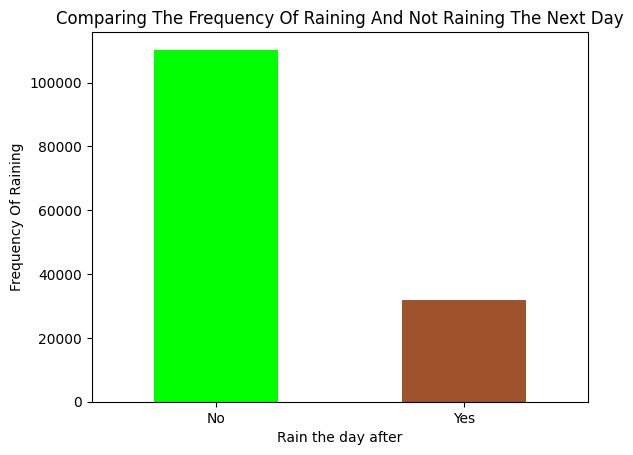

In [20]:
plt.xlabel("Rain the day after")
plt.ylabel("Frequency Of Raining")
color = ['lime', 'sienna']
valueCounts.plot(kind = 'bar', title = 'Comparing The Frequency Of Raining And Not Raining The Next Day', rot = 0, color=color)

As you can see the ratio of the target values are 1 to 3, so the dataset is imbalanced.

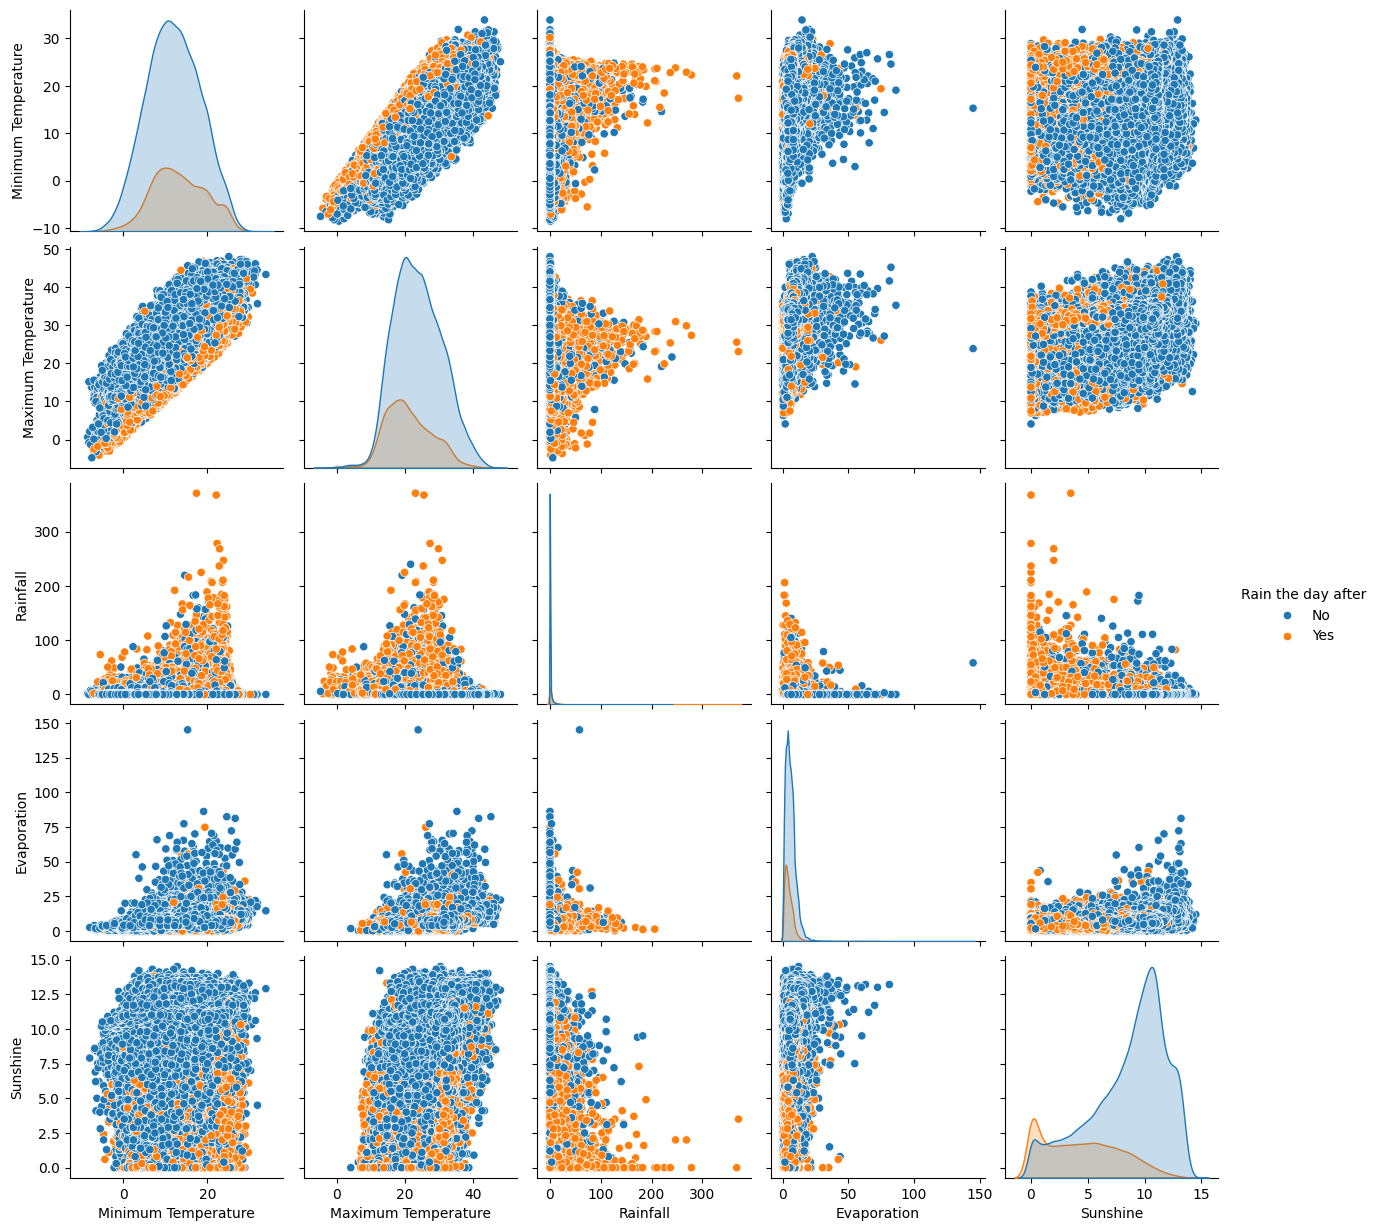

In [21]:
numerical_columns = df.select_dtypes(include=['number']).columns
subset_columns = numerical_columns.tolist()[:5]  # Selecting the first 5 numerical features for the pair plot
subset_columns.append('Rain the day after')

# Create a pair plot
sns.pairplot(df[subset_columns], hue='Rain the day after', diag_kind='kde')
plt.show()

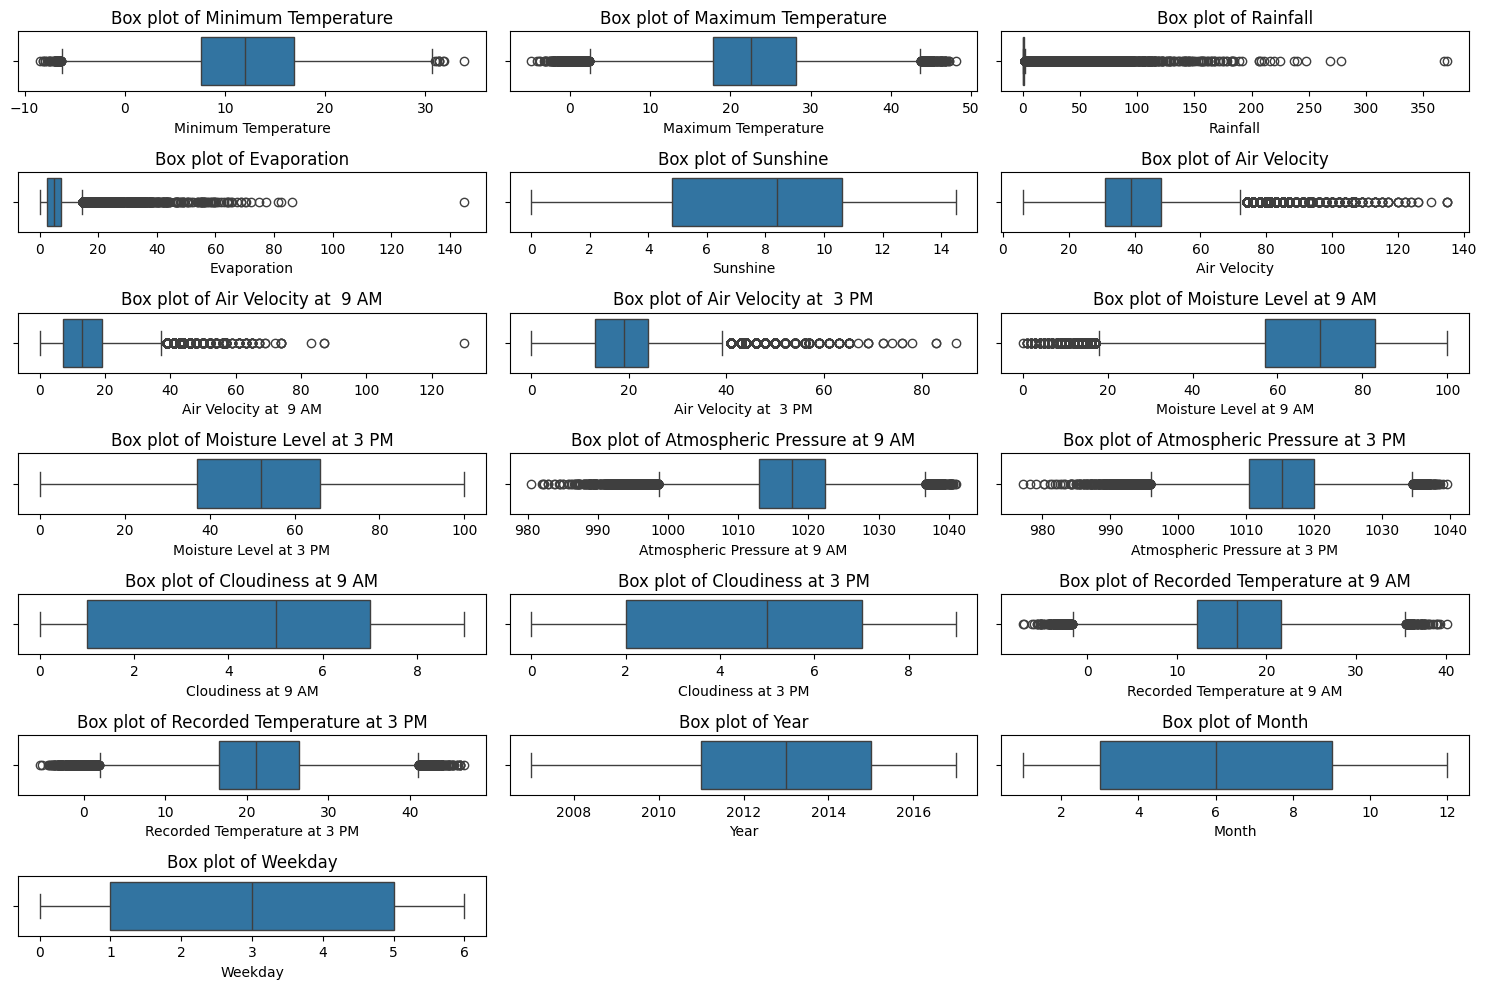

In [22]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')

plt.tight_layout()
plt.show()

The line inside the box represents the median of the data, which is the middle value.
The box itself represents the interquartile range, which is the range between the first
quartile (Q1, the 25th percentile) and the third quartile (Q3, the 75th percentile). 
This range contains the middle 50% of the data.
The lines extending from the box, known as whiskers, typically show the range of the data 
within 1.5 times the IQR from the lower and upper quartiles. Data points outside this range 
are considered potential outliers.
individual points that fall outside the whiskers and are typically shown as individual dots 
or small circles are outliers.

## <blockquote>*2. 3. Filling Missing Values*</blockquote>
---

In [22]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['number']).columns

for column in categorical_columns:
    mode = df[column].mode()[0]
    df[column].fillna(mode, inplace=True)

for column in numerical_columns:
    mean = df[column].mean()
    df[column].fillna(mean, inplace=True)

C:\Users\Aria\AppData\Local\Temp\ipykernel_16268\3719094157.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode, inplace=True)
C:\Users\Aria\AppData\Local\Temp\ipykernel_16268\3719094157.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

It is better to fill the categorical features using their mode, and it is better to fill the numerical features using their mean

We then later decide to wether keep some of these columns or not, using the Correlation Matrix

In [23]:
df.head()

Weather Station  Minimum Temperature  Maximum Temperature  Rainfall  \
0       Station 2                 13.4                 22.9       0.6   
1       Station 2                  7.4                 25.1       0.0   
2       Station 2                 12.9                 25.7       0.0   
3       Station 2                  9.2                 28.0       0.0   
4       Station 2                 17.5                 32.3       1.0   

   Evaporation  Sunshine Gust Trajectory  Air Velocity  \
0     5.468232  7.611178               W          44.0   
1     5.468232  7.611178             WNW          44.0   
2     5.468232  7.611178             WSW          46.0   
3     5.468232  7.611178              NE          24.0   
4     5.468232  7.611178               W          41.0   

  Gust Trajectory at  9 AM Gust Trajectory at  3 PM  ...  \
0                        W                      WNW  ...   
1                      NNW                      WSW  ...   
2                        W                      WSW  ...   
3                       SE                        E  ...   
4                      ENE                       NW  ...   

   Atmospheric Pressure at 3 PM  Cloudiness at 9 AM  Cloudiness at 3 PM  \
0                        1007.1            8.000000             4.50993   
1                        1007.8            4.447461             4.50993   
2                        1008.7            4.447461             2.00000   
3                        1012.8            4.447461             4.50993   
4                        1006.0            7.000000             8.00000   

   Recorded Temperature at 9 AM  Recorded Temperature at 3 PM  Rain that day  \
0                          16.9                          21.8             No   
1                          17.2                          24.3             No   
2                          21.0                          23.2             No   
3                          18.1                          26.5             No   
4                          17.8                          29.7             No   

   Year  Month  Weekday  Rain the day after  
0  2008     12        0                  No  
1  2008     12        1                  No  
2  2008     12        2                  No  
3  2008     12        3                  No  
4  2008     12        4                  No  

[5 rows x 25 columns]

# <blockquote>*3. Preproccesing*</blockquote>
---

## <blockquote>*3. 2. Label Encoding*</blockquote>
---

In [24]:
X = df.drop("Rain the day after", axis=1)
y = df["Rain the day after"]

In [25]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [26]:
# Split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Further split the train set into 90% train and 10% validation
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

We will split the dataset to train, validation and test set. If the dataset works well on both train set and validation set, we can say the algorithms were likely not overfitted or underfitted

If the algorithms work well on the train set but not on the validation test, we can say it has overfitted.

if the algorithms didn't work well on the both train and validation set, it is likely that it has underfitted.

In [27]:
print(f"Train set size: {X_train.shape}")
print(f"Validation set size: {X_validation.shape}")
print(f"Test set size: {X_test.shape}")

Train set size: (104731, 24)
Validation set size: (11637, 24)
Test set size: (29092, 24)


In [28]:
print(f"y_train: {y_train[:5]}")
print(f"y_validation: {y_validation[:5]}")
print(f"y_test: {y_test[:5]}")

y_train: [0 0 0 0 0]
y_validation: [0 1 1 0 0]
y_test: [1 0 0 0 0]


## <blockquote>*3. 3. One-Hot Encoding*</blockquote>
---

In [29]:
# Apply one-hot encoding to categorical features
encoder = OneHotEncoder(sparse_output=False, drop='first')

# Remove the target column from categorical columns if it is present
categorical_columns = categorical_columns.drop("Rain the day after")

# Fit the encoder on the training data
encoder.fit(X_train[categorical_columns])

# Transform train, validation, and test sets
X_train_encoded = encoder.transform(X_train[categorical_columns])
X_validation_encoded = encoder.transform(X_validation[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

# Convert the encoded features back to DataFrame and add numerical features
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_validation_encoded_df = pd.DataFrame(X_validation_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(categorical_columns))

X_train = pd.concat([X_train[numerical_columns].reset_index(drop=True), X_train_encoded_df], axis=1)
X_validation = pd.concat([X_validation[numerical_columns].reset_index(drop=True), X_validation_encoded_df], axis=1)
X_test = pd.concat([X_test[numerical_columns].reset_index(drop=True), X_test_encoded_df], axis=1)

# Display the size of each set and the first few encoded target values
print(f"Train set size: {X_train.shape}")
print(f"Validation set size: {X_validation.shape}")
print(f"Test set size: {X_test.shape}")

Train set size: (104731, 113)
Validation set size: (11637, 113)
Test set size: (29092, 113)


It is better to apply One-Hot encoding on categorical features which are not ordinal like categorical features in this dataset.

In [30]:
# Display the size of each set and the first few encoded target values
print(f"Train set size: {X_train.shape}")
print(f"Validation set size: {X_validation.shape}")
print(f"Test set size: {X_test.shape}")

Train set size: (104731, 113)
Validation set size: (11637, 113)
Test set size: (29092, 113)


## <blockquote>*3. 4. Normalization*</blockquote>
---

In [31]:
# Normalize the numerical features
scaler = RobustScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_validation = pd.DataFrame(scaler.transform(X_validation), columns=X_validation.columns, index=X_validation.index)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [32]:
X_train

Minimum Temperature  Maximum Temperature  Rainfall  Evaporation  \
0                 -0.307692            -0.633663  0.000000     0.000000   
1                  0.593407            -0.128713  0.000000     0.000000   
2                  0.285714             0.742574  0.000000     0.000000   
3                 -0.637363             0.386139  0.000000     0.000000   
4                 -0.615385            -1.009901  3.400000    -1.000000   
...                     ...                  ...       ...          ...   
104726             0.010333            -0.613861  2.360918     0.000000   
104727             0.076923            -0.297030  0.000000     0.892399   
104728             0.450549             0.207921  0.000000     0.000000   
104729            -0.769231            -0.346535  0.100000     0.000000   
104730            -0.131868            -0.306931  0.000000    -1.788500   

        Sunshine  Air Velocity  Air Velocity at  9 AM  Air Velocity at  3 PM  \
0       0.000000     -0.733333              -0.333333              -0.696605   
1       0.000000     -0.400000               0.916667              -0.514787   
2       0.000000      0.600000               0.333333              -0.332969   
3       0.000000     -0.866667              -0.750000              -1.332969   
4      -0.836847      0.866667               1.250000               0.485213   
...          ...           ...                    ...                    ...   
104726  0.000000     -0.866667              -0.500000              -1.151151   
104727 -0.561320      0.000000               0.333333               0.303395   
104728  0.000000     -0.733333              -0.166667              -0.878423   
104729  0.000000      0.069015              -1.083333              -0.878423   
104730  0.000000     -1.000000               0.166667              -1.151151   

        Moisture Level at 9 AM  Moisture Level at 3 PM  ...  \
0                    -0.461538               -0.412111  ...   
1                     0.346154                1.337889  ...   
2                    -0.269231               -0.376397  ...   
3                    -1.153846               -1.304968  ...   
4                     0.038462               -0.019254  ...   
...                        ...                     ...  ...   
104726                0.115385               -0.090683  ...   
104727               -0.653846               -0.233540  ...   
104728               -0.038462               -0.733540  ...   
104729                1.038462                0.516460  ...   
104730                0.192308               -0.197826  ...   

        Gust Trajectory at  3 PM_NW  Gust Trajectory at  3 PM_S  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   
3                               0.0                         0.0   
4                               0.0                         0.0   
...                             ...                         ...   
104726                          0.0                         0.0   
104727                          0.0                         0.0   
104728                          0.0                         0.0   
104729                          0.0                         0.0   
104730                          0.0                         0.0   

        Gust Trajectory at  3 PM_SE  Gust Trajectory at  3 PM_SSE  \
0                               0.0                           0.0   
1                               1.0                           0.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               0.0                           0.0   
...                             ...                           ...   
104726                          0.0                           0.0   
104727                          

Normalizing data is crucial in this context because:

Improving Model Performance: Many machine learning algorithms, including SVM, are sensitive to the scale of the data. Normalization ensures that each feature contributes equally to the result, preventing features with larger scales from dominating the model's predictions.

Faster Convergence: Algorithms converge faster when the data is normalized.

Reducing Outlier Impact: Normalization helps mitigate the effect of outliers. When data is scaled to a similar range, the influence of extreme values is reduced, which can improve model robustness and generalization.

Using RobustScaler in this context is advantageous because:

Handling Outliers: RobustScaler is less sensitive to outliers compared to standard normalization techniques like StandardScaler or MinMaxScaler. It scales the data according to the interquartile range (IQR), which means it focuses on the central part of the distribution and ignores extreme values. Given that the dataset may contain outliers, this approach ensures that these outliers do not unduly influence the scaling process.

Improving Model Robustness: By reducing the impact of outliers, RobustScaler can improve the robustness and performance of the machine learning model. The SVM algorithm will then be trained on data where the scale of features is consistent and not skewed by extreme values, leading to better generalization to unseen data.

Consistent Scaling: RobustScaler ensures that the majority of the data is scaled consistently, which is particularly important for algorithms like SVM that are sensitive to the scale of the input features. This consistent scaling can result in more reliable and stable model performance.

## <blockquote>*3. 5. Finding & Deleting Outliers*</blockquote>
---

In [33]:
# Define a function to remove outliers using LOF
def remove_outliers_lof(X, y, contamination=0.05):
    lof = LocalOutlierFactor(contamination=contamination)
    outliers = lof.fit_predict(X)
    
    # Select inliers
    inliers = outliers != -1
    X_clean = X[inliers]
    y_clean = y[inliers]
    
    return X_clean, y_clean

# Remove outliers from the training data using LOF
X_train_clean, y_train_clean = remove_outliers_lof(X_train, y_train)

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outliers the samples that have a substantially lower density than their neighbors.

In [34]:
X_train_clean

Minimum Temperature  Maximum Temperature  Rainfall  Evaporation  \
0                 -0.307692            -0.633663  0.000000     0.000000   
1                  0.593407            -0.128713  0.000000     0.000000   
2                  0.285714             0.742574  0.000000     0.000000   
3                 -0.637363             0.386139  0.000000     0.000000   
4                 -0.615385            -1.009901  3.400000    -1.000000   
...                     ...                  ...       ...          ...   
104726             0.010333            -0.613861  2.360918     0.000000   
104727             0.076923            -0.297030  0.000000     0.892399   
104728             0.450549             0.207921  0.000000     0.000000   
104729            -0.769231            -0.346535  0.100000     0.000000   
104730            -0.131868            -0.306931  0.000000    -1.788500   

        Sunshine  Air Velocity  Air Velocity at  9 AM  Air Velocity at  3 PM  \
0       0.000000     -0.733333              -0.333333              -0.696605   
1       0.000000     -0.400000               0.916667              -0.514787   
2       0.000000      0.600000               0.333333              -0.332969   
3       0.000000     -0.866667              -0.750000              -1.332969   
4      -0.836847      0.866667               1.250000               0.485213   
...          ...           ...                    ...                    ...   
104726  0.000000     -0.866667              -0.500000              -1.151151   
104727 -0.561320      0.000000               0.333333               0.303395   
104728  0.000000     -0.733333              -0.166667              -0.878423   
104729  0.000000      0.069015              -1.083333              -0.878423   
104730  0.000000     -1.000000               0.166667              -1.151151   

        Moisture Level at 9 AM  Moisture Level at 3 PM  ...  \
0                    -0.461538               -0.412111  ...   
1                     0.346154                1.337889  ...   
2                    -0.269231               -0.376397  ...   
3                    -1.153846               -1.304968  ...   
4                     0.038462               -0.019254  ...   
...                        ...                     ...  ...   
104726                0.115385               -0.090683  ...   
104727               -0.653846               -0.233540  ...   
104728               -0.038462               -0.733540  ...   
104729                1.038462                0.516460  ...   
104730                0.192308               -0.197826  ...   

        Gust Trajectory at  3 PM_NW  Gust Trajectory at  3 PM_S  \
0                               0.0                         0.0   
1                               0.0                         0.0   
2                               0.0                         0.0   
3                               0.0                         0.0   
4                               0.0                         0.0   
...                             ...                         ...   
104726                          0.0                         0.0   
104727                          0.0                         0.0   
104728                          0.0                         0.0   
104729                          0.0                         0.0   
104730                          0.0                         0.0   

        Gust Trajectory at  3 PM_SE  Gust Trajectory at  3 PM_SSE  \
0                               0.0                           0.0   
1                               1.0                           0.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               0.0                           0.0   
...                             ...                           ...   
104726                          0.0                           0.0   
104727                          

## <blockquote>*3. 6. Resampling With SMOTE*</blockquote>
---

In [35]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_clean, y_train_clean)

as we know the dataset is imbalanced so we can avoid bias by resampling.

SMOTE (Synthetic Minority Over-sampling Technique) is an over-sampling method used to address the issue of class imbalance in classification problems.

Why Use SMOTE in Our Code?

Handling Imbalanced Classes: In our dataset, there is an imbalance in the classes. SMOTE helps to create a balanced dataset by generating synthetic instances for the minority class, which can improve the performance of the machine learning model.

Avoiding Overfitting: Unlike simple oversampling techniques that duplicate minority class instances, SMOTE generates new, synthetic samples. This reduces the risk of overfitting because the model does not learn to simply recognize duplicated instances.

## <blockquote>*3. 8. Calculating The Correlation Matrix And Feature Selection*</blockquote>
---

In [36]:
# Combine X_train_resampled and y_train_resampled for correlation analysis
train_resampled_df = pd.DataFrame(X_train_resampled, columns=X_train.columns)
train_resampled_df['Rain the day after'] = y_train_resampled

C:\Users\Aria\AppData\Local\Temp\ipykernel_16268\70983183.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_resampled_df['Rain the day after'] = y_train_resampled


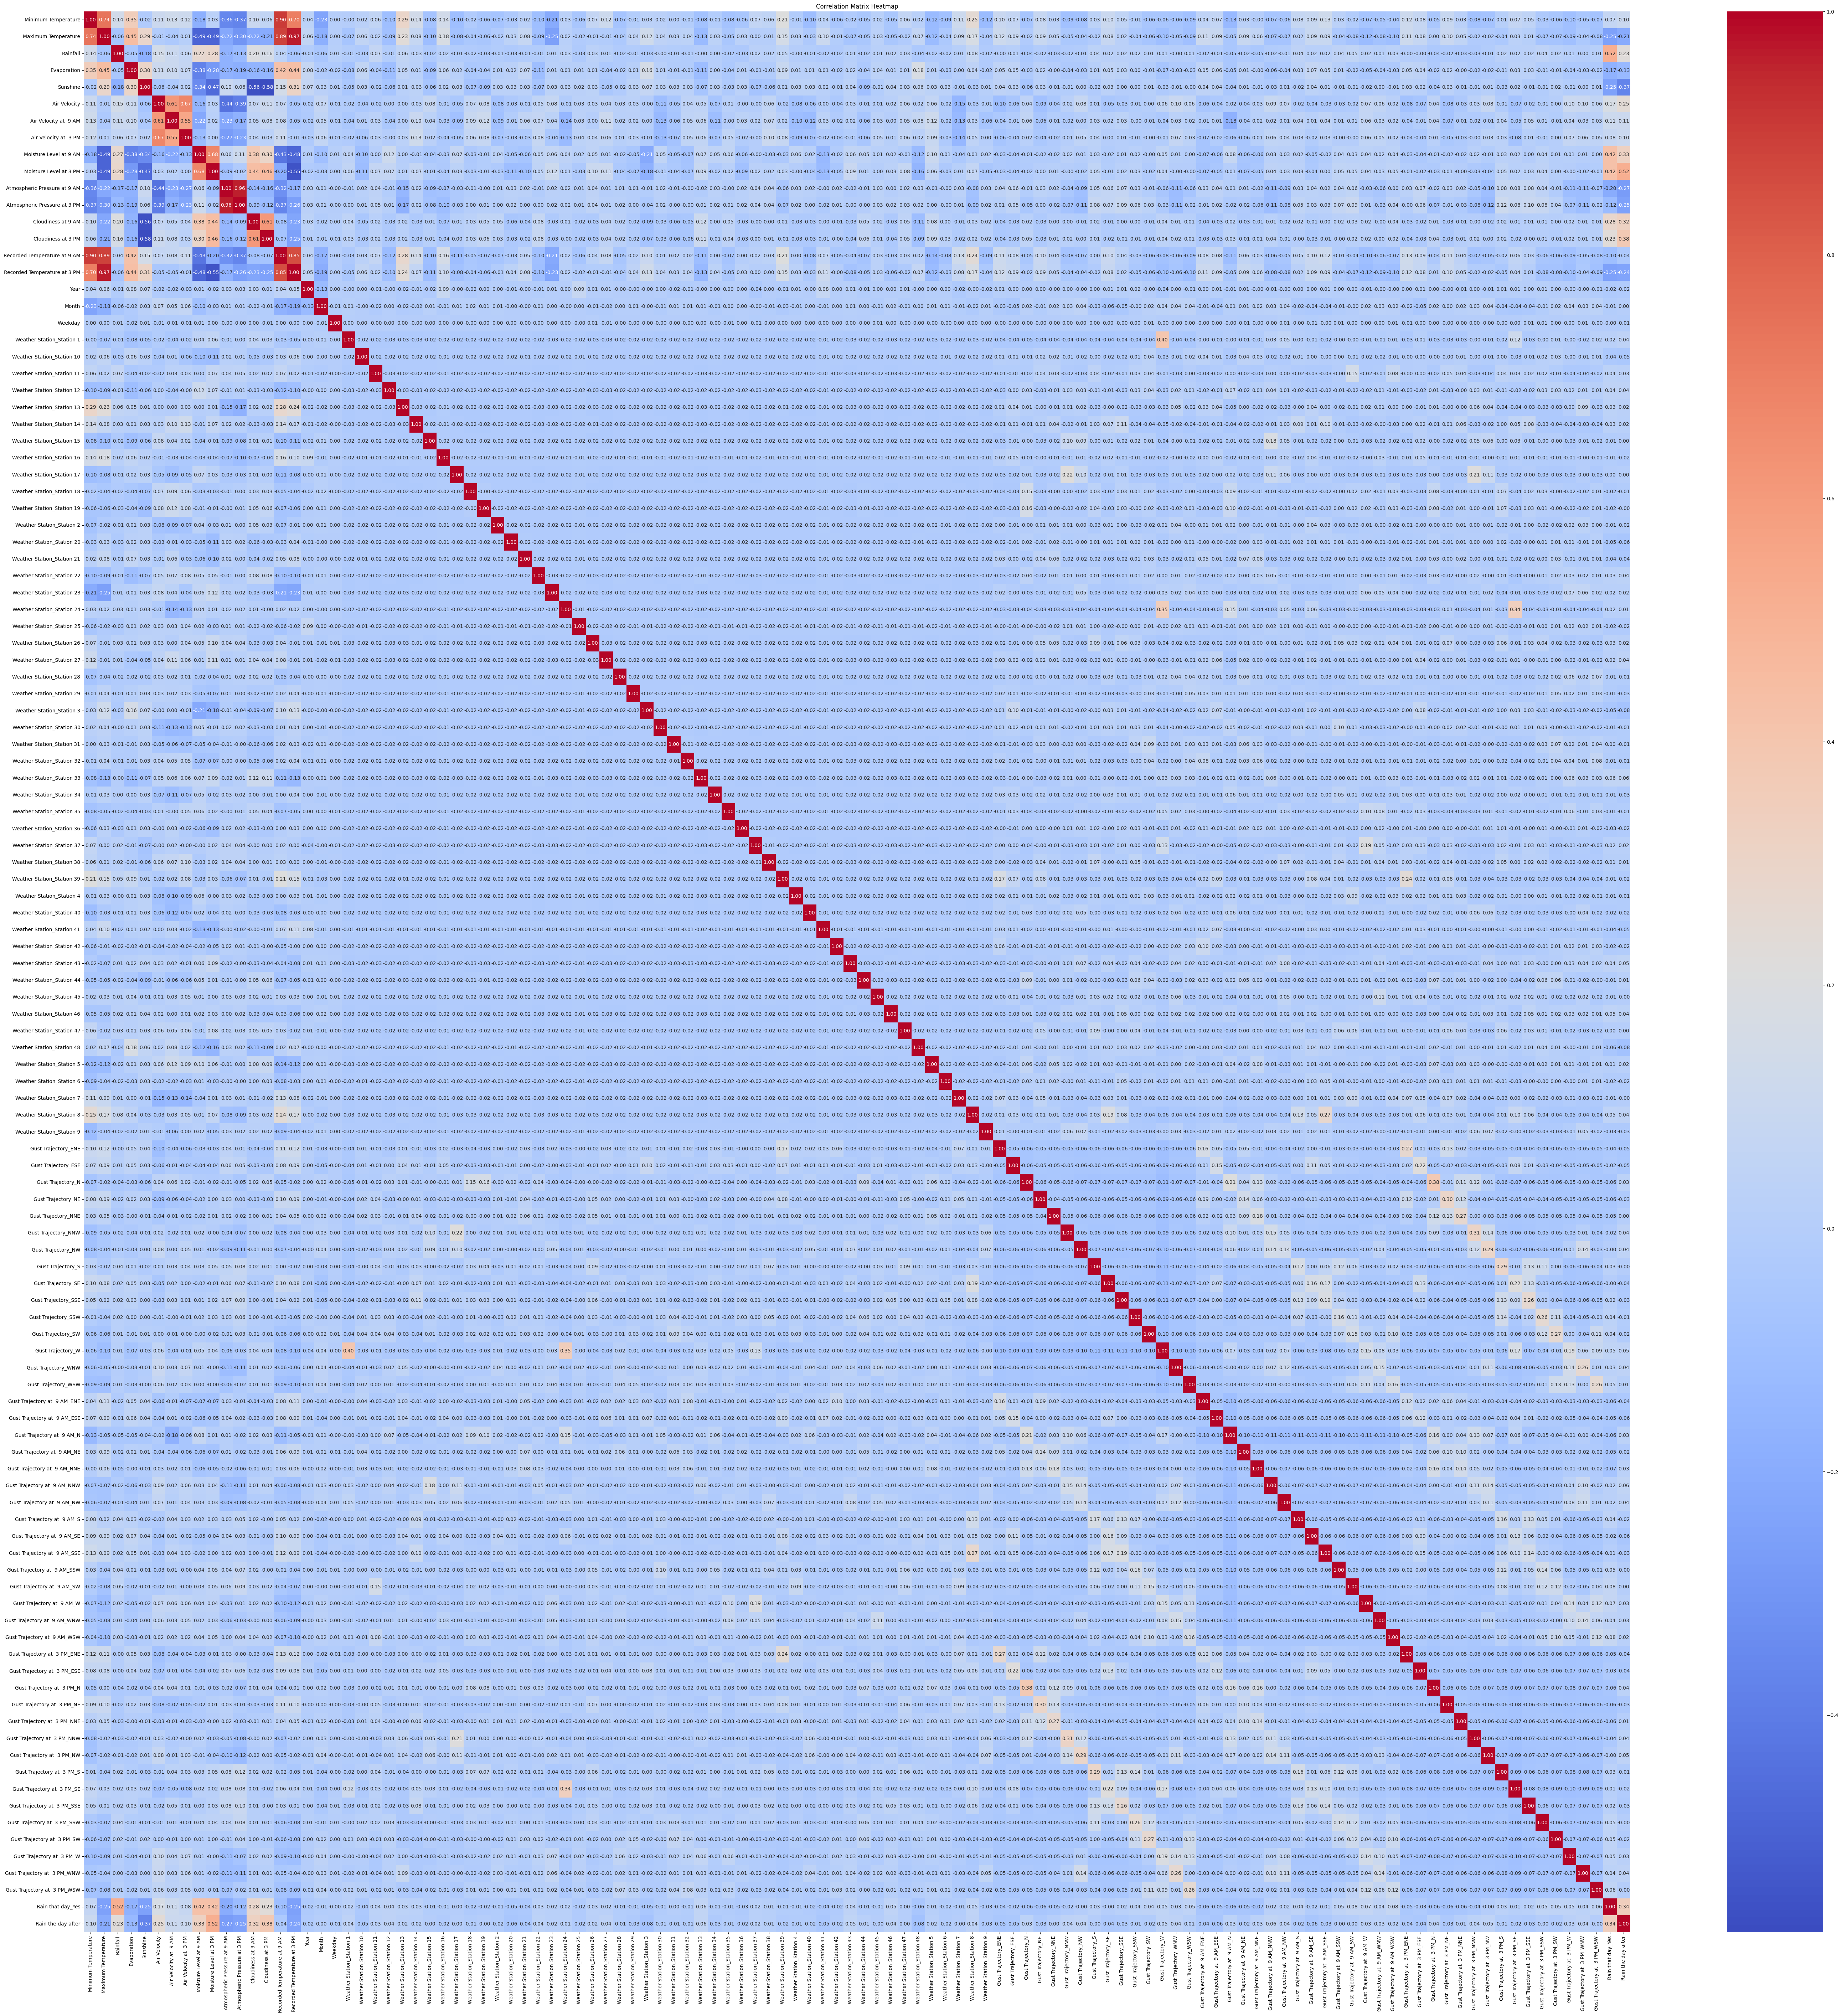

In [37]:
# Calculate the correlation matrix
corr_matrix = train_resampled_df.corr()

# Plot the heatmap
plt.figure(figsize=(70, 70))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [38]:
# Identify features with high correlation (>0.8 or < -0.8) to drop one of the pair
threshold = 0.8
corr_target = abs(corr_matrix["Rain the day after"])

# Create a set to hold features to drop
to_drop_high_corr = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            to_drop_high_corr.add(colname)

# Drop features with low correlation with the label column
low_corr_features = corr_target[corr_target.abs() < 0.05].index
to_drop_low_corr = set(low_corr_features)

# Combine both sets of features to drop
to_drop = to_drop_high_corr.union(to_drop_low_corr)

# Drop the identified features
X_train_dropped = train_resampled_df.drop(columns=to_drop).drop(columns=['Rain the day after'])
X_validation_dropped = pd.DataFrame(X_validation, columns=X_train.columns).drop(columns=to_drop)
X_test_dropped = pd.DataFrame(X_test, columns=X_train.columns).drop(columns=to_drop)

We have 2 hyperparameters here, the high correlation threshold and the low correlation threshold, by experimenting different numbers, we concluded that if we set the high threshold = 0.8 and the low threshold = 0.05, we get a good result. We know it was better to use grid search for finding the hyperparameters in this code, but unfortunately it had a long runtime.

We used the Correlation Matrix to delete the columns that could weak our model or the columns that were very alike

In [39]:
print(f"Dropped features: {to_drop}")
print(f"Shape of X_train after dropping features: {X_train_dropped.shape}")
print(f"Shape of X_validation after dropping features: {X_validation_dropped.shape}")
print(f"Shape of X_test after dropping features: {X_test_dropped.shape}")

Dropped features: {'Weather Station_Station 26', 'Weekday', 'Gust Trajectory at  3 PM_SW', 'Gust Trajectory at  3 PM_WNW', 'Gust Trajectory at  9 AM_S', 'Weather Station_Station 8', 'Gust Trajectory at  9 AM_WSW', 'Gust Trajectory_SE', 'Gust Trajectory at  3 PM_S', 'Gust Trajectory at  9 AM_W', 'Weather Station_Station 21', 'Weather Station_Station 22', 'Gust Trajectory_WNW', 'Weather Station_Station 23', 'Gust Trajectory_NNW', 'Weather Station_Station 35', 'Gust Trajectory at  3 PM_SE', 'Gust Trajectory at  3 PM_WSW', 'Weather Station_Station 14', 'Weather Station_Station 9', 'Gust Trajectory_NW', 'Weather Station_Station 47', 'Gust Trajectory at  9 AM_NE', 'Gust Trajectory_NE', 'Weather Station_Station 31', 'Weather Station_Station 15', 'Weather Station_Station 25', 'Gust Trajectory at  3 PM_SSE', 'Gust Trajectory at  3 PM_NE', 'Weather Station_Station 40', 'Weather Station_Station 10', 'Weather Station_Station 4', 'Weather Station_Station 42', 'Gust Trajectory at  9 AM_NW', 'Weather

In [40]:
train_dropped_df = pd.DataFrame(X_train_dropped, columns=X_train_dropped.columns)
train_dropped_df['Rain the day after'] = y_train_resampled

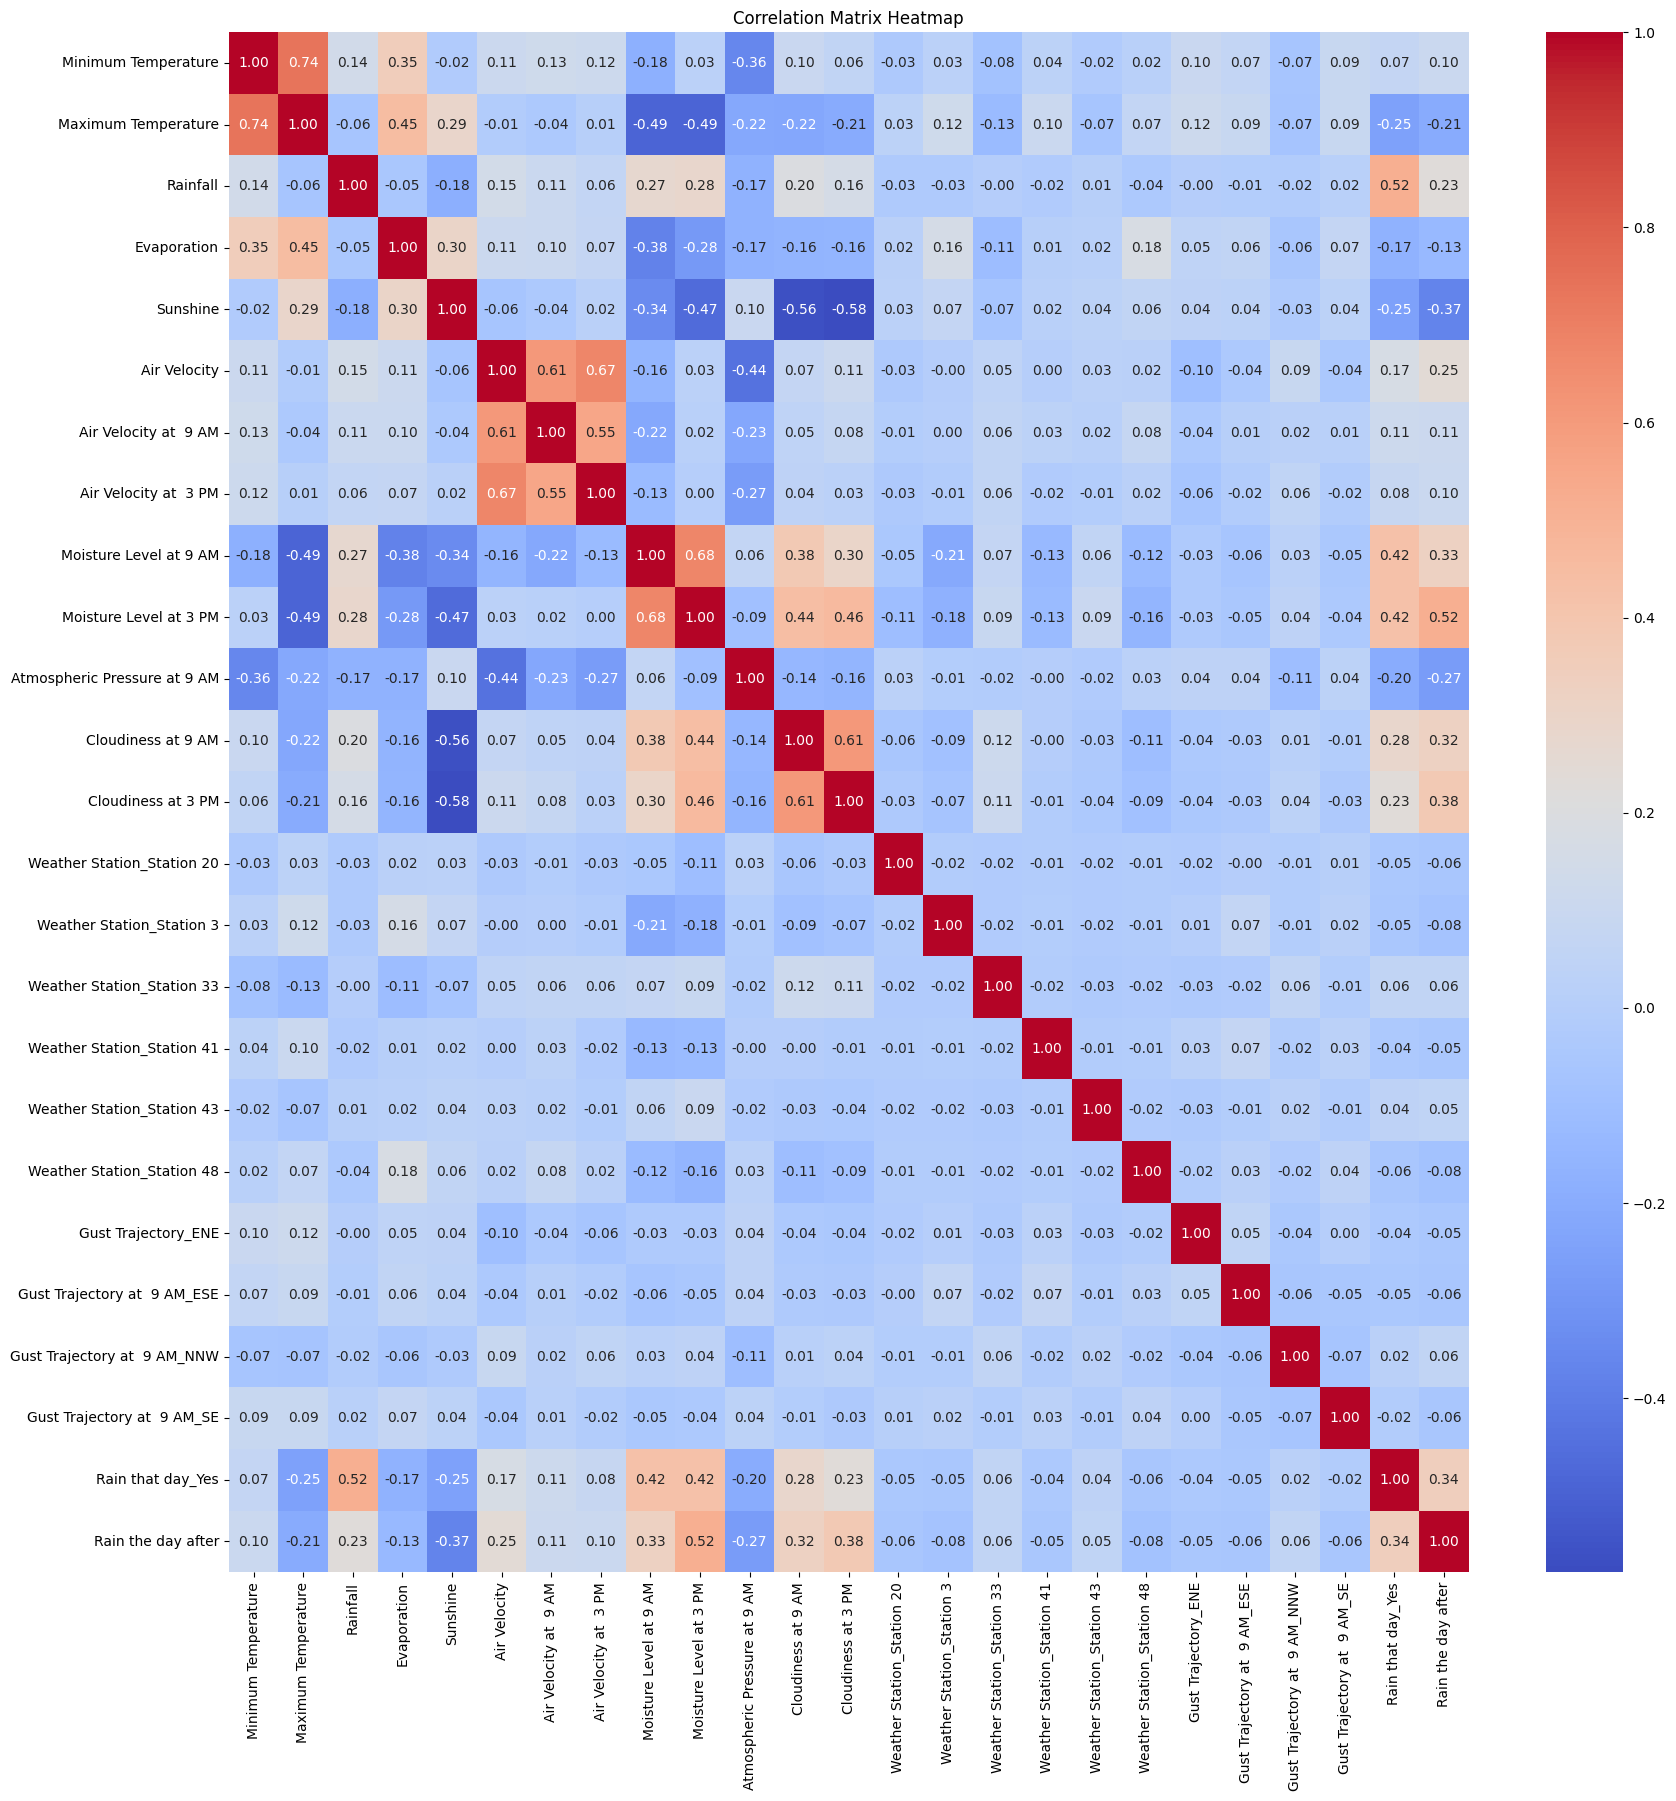

In [41]:
# Calculate the correlation matrix
corr_matrix = train_dropped_df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# <blockquote>*4. Model Training With Train Set*</blockquote>
---

## <blockquote>*4. 1. KNN*</blockquote>
---

In [42]:
# Train and evaluate K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train_dropped, y_train_resampled)
y_pred_X_validation_knn = knn.predict(X_validation_dropped)

In [43]:
y_pred_X_train_knn = knn.predict(X_train_dropped)

## <blockquote>*4. 2. Descision Tree*</blockquote>
---

In [44]:
# Train and evaluate Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_dropped, y_train_resampled)
y_pred_X_validation_dt = dt.predict(X_validation_dropped)

In [45]:
y_pred_X_train_dt = dt.predict(X_train_dropped)

## <blockquote>*4. 3. SVM*</blockquote>
---

In [46]:
# Train and evaluate Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train_dropped, y_train_resampled)
y_pred_X_validation_svm = svm.predict(X_validation_dropped)

In [47]:
y_pred_X_train_svm = svm.predict(X_train_dropped)

# <blockquote>*5. Checking For Overfit Or Underfit*</blockquote>
---

## <blockquote>*5. 1. KNN*</blockquote>
---

In [48]:
accuracy_X_train_knn = accuracy_score(y_train_resampled, y_pred_X_train_knn)
precision_X_train_knn = precision_score(y_train_resampled, y_pred_X_train_knn)
recall_X_train_knn = recall_score(y_train_resampled, y_pred_X_train_knn)
f1_X_train_knn = f1_score(y_train_resampled, y_pred_X_train_knn)

In [49]:
accuracy_X_validation_knn = accuracy_score(y_validation, y_pred_X_validation_knn)
precision_X_validation_knn = precision_score(y_validation, y_pred_X_validation_knn)
recall_X_validation_knn = recall_score(y_validation, y_pred_X_validation_knn)
f1_X_validation_knn = f1_score(y_validation, y_pred_X_validation_knn)

In [50]:
print(f"KNN Accuracy On X Train: {accuracy_X_train_knn}")
print(f"KNN Precision On X Train: {precision_X_train_knn}")
print(f"KNN Recall On X Train: {recall_X_train_knn}")
print(f"KNN F1 Score On X Train: {f1_X_train_knn}")

KNN Accuracy On X Train: 0.897446917698377
KNN Precision On X Train: 0.8411258176052151
KNN Recall On X Train: 0.9799987170440695
KNN F1 Score On X Train: 0.9052672746342417


In [51]:
print(f"KNN Accuracy On X Validation: {accuracy_X_validation_knn}")
print(f"KNN Precision On X Validation: {precision_X_validation_knn}")
print(f"KNN Recall On X Validation: {recall_X_validation_knn}")
print(f"KNN F1 Score On X Validation: {f1_X_validation_knn}")

KNN Accuracy On X Validation: 0.7562945776402853
KNN Precision On X Validation: 0.46153846153846156
KNN Recall On X Validation: 0.739009900990099
KNN F1 Score On X Validation: 0.5682095006090134


There is a high probability that KNN has overfit because the algorithm works well on the train set but not the validation set.

## <blockquote>*5. 2. Decision Tree*</blockquote>
---

In [52]:
accuracy_X_train_dt = accuracy_score(y_train_resampled, y_pred_X_train_dt)
precision_X_train_dt = precision_score(y_train_resampled, y_pred_X_train_dt)
recall_X_train_dt = recall_score(y_train_resampled, y_pred_X_train_dt)
f1_X_train_dt = f1_score(y_train_resampled, y_pred_X_train_dt)

In [53]:
accuracy_X_validation_dt = accuracy_score(y_validation, y_pred_X_validation_dt)
precision_X_validation_dt = precision_score(y_validation, y_pred_X_validation_dt)
recall_X_validation_dt = recall_score(y_validation, y_pred_X_validation_dt)
f1_X_validation_dt = f1_score(y_validation, y_pred_X_validation_dt)

In [54]:
print(f"Decision Tree Accuracy On X Train: {accuracy_X_train_dt}")
print(f"Decision Tree Precision On X Train: {precision_X_train_dt}")
print(f"Decision Tree Recall On X Train: {recall_X_train_dt}")
print(f"Decision Tree F1 Score On X Train: {f1_X_train_dt}")

Decision Tree Accuracy On X Train: 0.9999615113220861
Decision Tree Precision On X Train: 1.0
Decision Tree Recall On X Train: 0.9999230226441722
Decision Tree F1 Score On X Train: 0.9999615098406507


In [55]:
print(f"Decision Tree Accuracy On X Validation: {accuracy_X_validation_dt}")
print(f"Decision Tree Precision On X Validation: {precision_X_validation_dt}")
print(f"Decision Tree Recall On X Validation: {recall_X_validation_dt}")
print(f"Decision Tree F1 Score On X Validation: {f1_X_validation_dt}")

Decision Tree Accuracy On X Validation: 0.7617942768754834
Decision Tree Precision On X Validation: 0.4596800522363696
Decision Tree Recall On X Validation: 0.5576237623762377
Decision Tree F1 Score On X Validation: 0.5039370078740157


There is a high probability that Decision Tree has overfit because the algorithm works well on the train set but not the validation set.

## <blockquote>*5. 3. SVM*</blockquote>
---

In [56]:
accuracy_X_train_svm = accuracy_score(y_train_resampled, y_pred_X_train_svm)
precision_X_train_svm = precision_score(y_train_resampled, y_pred_X_train_svm)
recall_X_train_svm = recall_score(y_train_resampled, y_pred_X_train_svm)
f1_X_train_svm = f1_score(y_train_resampled, y_pred_X_train_svm)

In [57]:
accuracy_X_validation_svm = accuracy_score(y_validation, y_pred_X_validation_svm)
precision_X_validation_svm = precision_score(y_validation, y_pred_X_validation_svm)
recall_X_validation_svm = recall_score(y_validation, y_pred_X_validation_svm)
f1_X_validation_svm = f1_score(y_validation, y_pred_X_validation_svm)

In [58]:
print(f"SVM Accuracy On X Train: {accuracy_X_train_svm}")
print(f"SVM Precision On X Train: {precision_X_train_svm}")
print(f"SVM Recall On X Train: {recall_X_train_svm}")
print(f"SVM F1 Score On X Train: {f1_X_train_svm}")

SVM Accuracy On X Train: 0.7861761498492527
SVM Precision On X Train: 0.7925070156573737
SVM Recall On X Train: 0.7753544165757906
SVM F1 Score On X Train: 0.7838368903328728


In [59]:
print(f"SVM Accuracy On X Validation: {accuracy_X_validation_svm}")
print(f"SVM Precision On X Validation: {precision_X_validation_svm}")
print(f"SVM Recall On X Validation: {recall_X_validation_svm}")
print(f"SVM F1 Score On X Validation: {f1_X_validation_svm}")

SVM Accuracy On X Validation: 0.7950502706883217
SVM Precision On X Validation: 0.5187466523835029
SVM Recall On X Validation: 0.7671287128712871
SVM F1 Score On X Validation: 0.6189487138520531


This algorithm is likely to do better on the test set than the 2 first algorithms because the SVM has a normally good result on both sets.

# <blockquote>*6. Model Training Train Set + Validation Set*</blockquote>
---

In [60]:
# Combine training and validation sets for final model training
X_train_combined = np.concatenate([X_train_dropped, X_validation_dropped], axis=0)
y_train_combined = np.concatenate([y_train_resampled, y_validation], axis=0)

## <blockquote>*6. 1. KNN*</blockquote>
---

In [61]:
# Train and evaluate K-Nearest Neighbors (KNN) on combined data
knn = KNeighborsClassifier()
knn.fit(X_train_combined, y_train_combined)

KNeighborsClassifier()

In [62]:
y_pred_knn = knn.predict(X_test_dropped)

c:\Users\Aria\Desktop\University\Semester No.6\Data Mining\DataScience\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


## <blockquote>*6. 2. Decision Tree*</blockquote>
---

In [63]:
# Train and evaluate Decision Tree on combined data
dt = DecisionTreeClassifier()
dt.fit(X_train_combined, y_train_combined)

DecisionTreeClassifier()

In [64]:
y_pred_dt = dt.predict(X_test_dropped)

c:\Users\Aria\Desktop\University\Semester No.6\Data Mining\DataScience\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


## <blockquote>*6. 3. SVM*</blockquote>
---

In [65]:
# # # Train and evaluate Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train_combined, y_train_combined)

: 

In [ ]:
y_pred_svm = svm.predict(X_test_dropped)

c:\Users\Aria\Desktop\University\Semester No.6\Data Mining\DataScience\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


# <blockquote>*7. Evaluation*</blockquote>
---

## <blockquote>*7. 1. KNN*</blockquote>
---

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

In [ ]:
print(f"KNN Accuracy: {accuracy_knn}")
print(f"KNN Precision: {precision_knn}")
print(f"KNN Recall: {recall_knn}")
print(f"KNN F1 Score: {f1_knn}")

KNN Accuracy: 0.751065585040561
KNN Precision: 0.4586768550170923
KNN Recall: 0.7105919003115265
KNN F1 Score: 0.5574972503971648


Accuracy: 0.751
Meaning: Accuracy is the proportion of correctly classified instances (both true positives and true negatives) out of the total instances. An accuracy of 0.751 means that 75.1% of the predictions made by the KNN model are correct.
Analysis: While this indicates a fairly good overall performance, accuracy alone can be misleading, especially with imbalanced datasets. So, it is crucial to look at other metrics.

Precision: 0.459
Meaning: Precision is the proportion of true positive predictions out of all positive predictions made by the model. In other words, it measures how many of the predicted positive instances are actually positive.
A precision of 0.459 means that only about 45.9% of the instances that the model predicted as positive are actually positive. This suggests that the model has a relatively high rate of false positives.

Recall: 0.711
Meaning: Recall (also known as sensitivity or true positive rate) is the proportion of actual positive instances that are correctly identified by the model. It measures how well the model can identify positive instances.
Analysis: A recall of 0.711 means that the model correctly identifies 71.1% of the actual positive instances. This indicates that the model is fairly good at identifying positive instances but misses about 28.9% of them.

F1 Score: 0.557
Meaning: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both precision and recall, especially useful for imbalanced datasets.
Analysis: An F1 score of 0.557 suggests a moderate balance between precision and recall. Given that precision is relatively low, the F1 score indicates that while the model is good at identifying positives (high recall), it struggles with false positives (low precision).

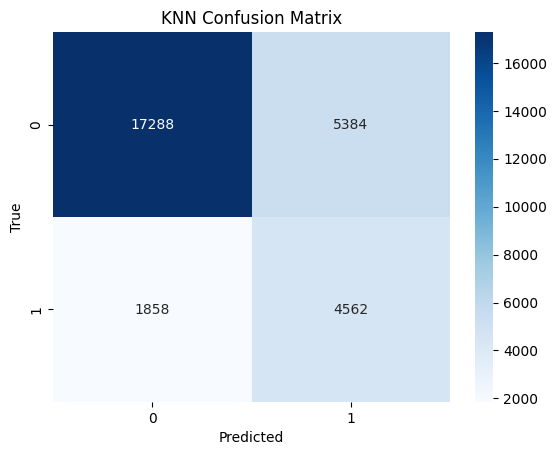

In [ ]:
# Confusion Matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

True Positives (TP): 4562 (bottom-right cell)
The number of positive instances correctly predicted as positive.

True Negatives (TN): 17288 (top-left cell)
The number of negative instances correctly predicted as negative.

False Positives (FP): 5384 (top-right cell)
The number of negative instances incorrectly predicted as positive.

False Negatives (FN): 1858 (bottom-left cell)
The number of positive instances incorrectly predicted as negative.

## <blockquote>*7. 2. Decision Tree*</blockquote>
---

In [ ]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

In [ ]:
print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree Precision: {precision_dt}")
print(f"Decision Tree Recall: {recall_dt}")
print(f"Decision Tree F1 Score: {f1_dt}")

Decision Tree Accuracy: 0.7671524817819332
Decision Tree Precision: 0.4760097587422066
Decision Tree Recall: 0.5470404984423676
Decision Tree F1 Score: 0.5090592839541963


Accuracy (0.767): This indicates that 76.7% of the predictions made by the model are correct. This is a reasonably good accuracy.

Precision (0.476): This means that 47.6% of the instances predicted as positive are actually positive. This is relatively low, indicating a higher rate of false positives.

Recall (0.547): This indicates that 54.7% of the actual positive instances are correctly identified. This is moderate but suggests the model misses a significant portion of positives.

F1 Score (0.509): This is the harmonic mean of precision and recall, indicating a balance between the two. A score of 0.509 is moderate, reflecting the trade-off between precision and recall.

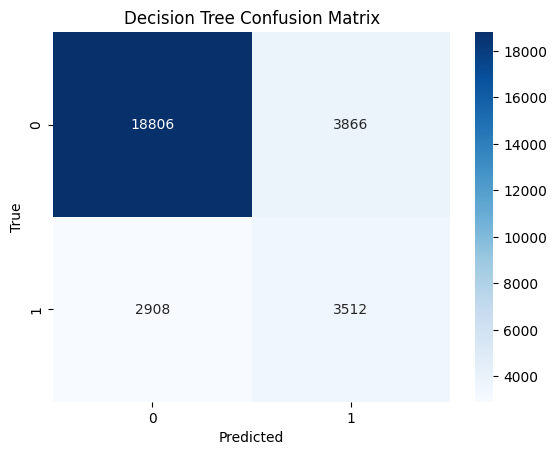

: 

In [ ]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

True Positives (TP): 3512 (bottom-right cell)
The number of positive instances correctly predicted as positive.

True Negatives (TN): 18806 (top-left cell)
The number of negative instances correctly predicted as negative.

False Positives (FP): 3866 (top-right cell)
The number of negative instances incorrectly predicted as positive.

False Negatives (FN): 12908 (bottom-left cell)
The number of positive instances incorrectly predicted as negative.

## <blockquote>*7. 3. SVM*</blockquote>
---

In [ ]:
# SVM evaluation on test set
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

In [ ]:
print(f"SVM Accuracy: {accuracy_svm}")
print(f"SVM Precision: {precision_svm}")
print(f"SVM Recall: {recall_svm}")
print(f"SVM F1 Score: {f1_svm}")

SVM Accuracy: 0.8015261927677713
SVM Precision: 0.5366628830874007
SVM Recall: 0.7364485981308411
SVM F1 Score: 0.6208798424162837


Accuracy (0.802): This indicates that 80.2% of the predictions made by the model are correct. This is a good accuracy, showing that the model performs well overall.

Precision (0.537): This means that 53.7% of the instances predicted as positive are actually positive. This is moderate, indicating a decent rate of false positives.

Recall (0.736): This indicates that 73.6% of the actual positive instances are correctly identified. This is good, showing that the model captures a large portion of positive instances.

F1 Score (0.621): This is the harmonic mean of precision and recall, indicating a balance between the two. A score of 0.621 is good, reflecting a reasonable trade-off between precision and recall.

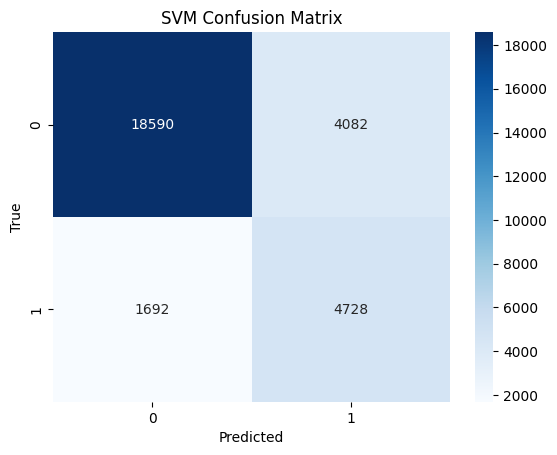

In [ ]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

True Positives (TP): 4728 (bottom-right cell)
The number of positive instances correctly predicted as positive.

True Negatives (TN): 18590 (top-left cell)
The number of negative instances correctly predicted as negative.

False Positives (FP): 4082 (top-right cell)
The number of negative instances incorrectly predicted as positive.

False Negatives (FN): 1692 (bottom-left cell)
The number of positive instances incorrectly predicted as negative.